In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [2]:
file_paths = {'in':'../../../data/prepared/activity_log_prepared.csv',
              'out':'../../../data/prepared/activity_log_prepared.csv'
             }

df = pd.read_csv(file_paths['in'])

# guarantee the timestamps are datetime objects
time_columns = ['start_time','end_time']

for time_col in time_columns:
    df[time_col] = pd.to_datetime(df[time_col])

In [3]:
df.head()

,ride_id,row_count,segment_count,start_time,end_time,elapsed_time,moving_time,elapsed_distance,elapsed_ascent,elapsed_descent,max_speed,avg_speed,ride_cruise_speed,avg_power,ride_avg_power,ride_max_power,peak_20min_power,training_window_id,perceived_exertion,simple_exertion,perceived_relative_effort,ride_work
0,2975587283,1352,5,2020-01-02 14:02:58+00:00,2020-01-02 14:29:32+00:00,1642,1411,5.266647,137.1458,138.7863,20.132460,14.045509,14.547075,NaN,116.870855,5.520265e+02,124.782357,0,7.0,HARD,45.0,191.901944
1,2992935347,1426,5,2020-01-08 13:20:26+00:00,2020-01-08 13:49:06+00:00,1728,1472,5.167961,215.2336,153.2227,31.764548,13.119808,14.154069,NaN,122.304555,9.702958e+02,131.178797,0,NaN,NaN,NaN,211.342270
2,2994399692,1423,7,2020-01-08 22:08:17+00:00,2020-01-08 22:35:04+00:00,1608,1481,5.257609,158.4723,219.4989,25.501115,13.339800,15.443823,NaN,113.161863,1.299650e+03,126.461932,0,NaN,NaN,NaN,181.964276
3,3248077156,2580,5,2020-04-02 21:38:02+00:00,2020-04-02 23:03:45+00:00,5143,2544,6.759676,329.4124,274.6197,29.974995,9.548413,13.495738,NaN,100.591028,2.608934e+05,737.913342,1,5.0,NORMAL,45.0,517.339656
4,3255473930,6416,12,2020-04-04 17:23:43+00:00,2020-04-04 19:59:16+00:00,9348,6356,22.730090,575.1593,576.4717,32.211935,12.764180,14.009717,NaN,100.591028,3.328601e+06,121.068376,1,5.0,NORMAL,114.0,940.324927


In [4]:
df.shape

(218, 22)

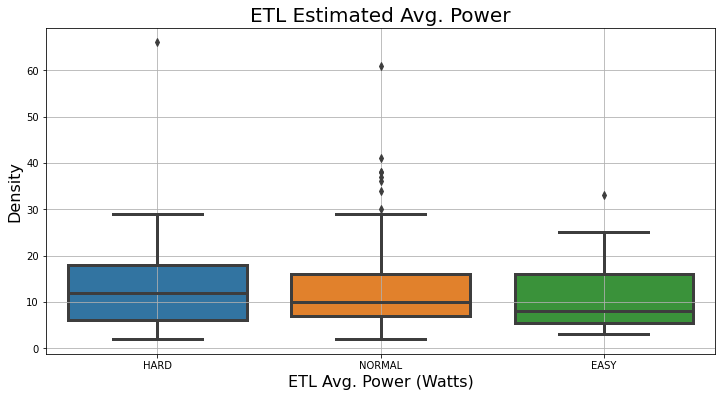

In [7]:
# Plot the Distributions of Average Powers for Strava
fig = plt.figure(figsize=(12,6))

_ = sns.boxplot(data=df, y='segment_count', x='simple_exertion', linewidth=3)
_ = plt.grid()
_ = plt.xlabel('ETL Avg. Power (Watts)' ,fontsize=16)
_ = plt.ylabel('Density' ,fontsize=16)
_ = plt.title('ETL Estimated Avg. Power' ,fontsize=20)